## PHASE3 PROJECT
NAME : Hanifa Chepchirchir

Project Title: Predicting Customer Churn

COURSE : DSFT-12

FACILITATOR : Nikita Njoroge

 ### Business Understanding
##### Objective:
SyriaTel is facing customer churn, which directly impacts revenue. The Customer Retention and Marketing Team wants to understand and predict which customers are most likely to churn.

##### Goal:
Build a classification model that predicts whether a customer will churn using features like service usage, international plan status, voicemail activity, and customer support interactions.

      Key Questions to Answer:

              Can we predict churn based on customer behavior?

              What are the most influential features in predicting churn?

              How can SyriaTel use these insights to reduce churn?

### Data Understanding
##### Data Source:
SyriaTel’s customer service usage dataset.

Description of Data:
Includes numerical and categorical features related to customer activity:

Account length

International and voicemail plans

Call durations, counts, and charges for day/evening/night/international

Number of customer service calls

Target: Churn (1 = Yes, 0 = No)

Initial Observations:

Data appears clean and ready for preprocessing

Target is binary and suitable for classification

Categorical variables already encoded



### Data Preparation

##### Steps Taken:

1. Verified and cleaned the dataset (nulls, duplicates, outliers if any)

2. Confirmed correct data types for each column

3. Selected relevant features for modeling:

         account length, international plan, voice mail plan, number vmail messages

         Call durations, counts, charges (day/eve/night/international)

         customer service calls

         Target Variable:

         churn (1 = Churned, 0 = Stayed)


In [432]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge,Lasso
from sklearn import metrics
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_curve, auc,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier


1. Data Loading

In [433]:
df = pd.read_csv('datasets_2667_4430_bigml_59c28831336c6604c800002a.csv') 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Loads the dataset and shows first 5 rows.

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [435]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [436]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [437]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [438]:
# Check for duplicates
df.duplicated().sum()

# Drop any duplicates
df = df.drop_duplicates()

# Check data types
df.dtypes

# Confirm categorical features are encoded (0/1)
df[['international_plan', 'voice_mail_plan', 'churn']].head()

,international_plan,voice_mail_plan,churn
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False


In [439]:
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)  


2.Data Cleaning:

In [440]:
df.drop(['phone number', 'area code', 'state'], axis=1, inplace=True, errors='ignore')


Drops unnecessary columns

Encodes categorical variables as binary

In [441]:
print(df.columns.tolist())


['account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [442]:
 # Encode categorical columns
le = LabelEncoder()
df["churn"] = le.fit_transform(df["churn"])
df["international_plan"] = le.fit_transform(df["international_plan"])
df["voice_mail_plan"] = le.fit_transform(df["voice_mail_plan"])

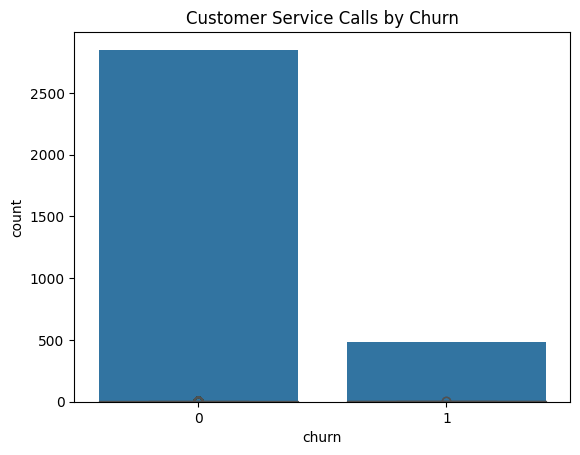

In [443]:

# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")

# Compare churn vs non-churn for key features
sns.boxplot(x='churn', y='customer_service_calls', data=df)
plt.title("Customer Service Calls by Churn")
plt.show()

In [444]:
# Convert target variable to binary
df['churn'] = df['churn'].astype(int)

In [447]:
# Check class distribution
import pandas as pd

print("\nClass distribution:\n", pd.Series(y).value_counts(normalize=True))



Class distribution:
 0    0.57
1    0.43
Name: proportion, dtype: float64


Class Distribution Visualization:

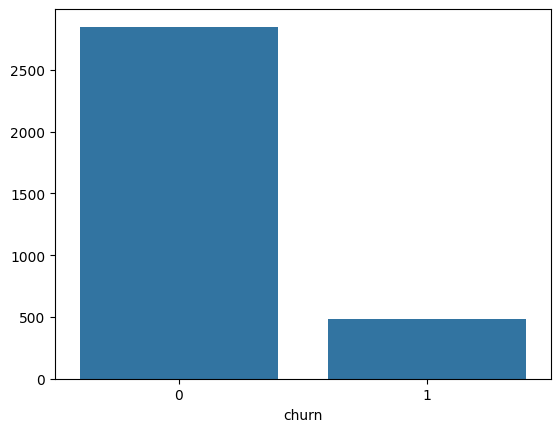

In [448]:
df['churn'].value_counts()
sns.barplot(x=df['churn'].value_counts().index, y=df['churn'].value_counts().values)
plt.show()

3. Feature Engineering:

In [449]:
# Total minutes
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
# Total calls
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

# Total charge
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Average minutes per call
df['avg_minutes_per_call'] = df['total_minutes'] / df['total_calls']

# Customer service calls per account length
df['service_calls_per_length'] = df['customer_service_calls'] / df['account_length']


Creates aggregated features from existing ones

In [450]:
print(df[['total_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].head())
print(df[['total_charge', 'total_day_charge', 'total_eve_charge', 'total_night_charge']].head())


   total_minutes  total_day_minutes  total_eve_minutes  total_night_minutes
0          707.2              265.1              197.4                244.7
1          611.5              161.6              195.5                254.4
2          527.2              243.4              121.2                162.6
3          558.2              299.4               61.9                196.9
4          501.9              166.7              148.3                186.9
   total_charge  total_day_charge  total_eve_charge  total_night_charge
0         72.86             45.07             16.78               11.01
1         55.54             27.47             16.62               11.45
2         59.00             41.38             10.30                7.32
3         65.02             50.90              5.26                8.86
4         49.36             28.34             12.61                8.41


In [ ]:
df.drop([
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_day_calls', 'total_eve_calls', 'total_night_calls',
    'total_day_charge', 'total_eve_charge', 'total_night_charge'
], axis=1, inplace=True)

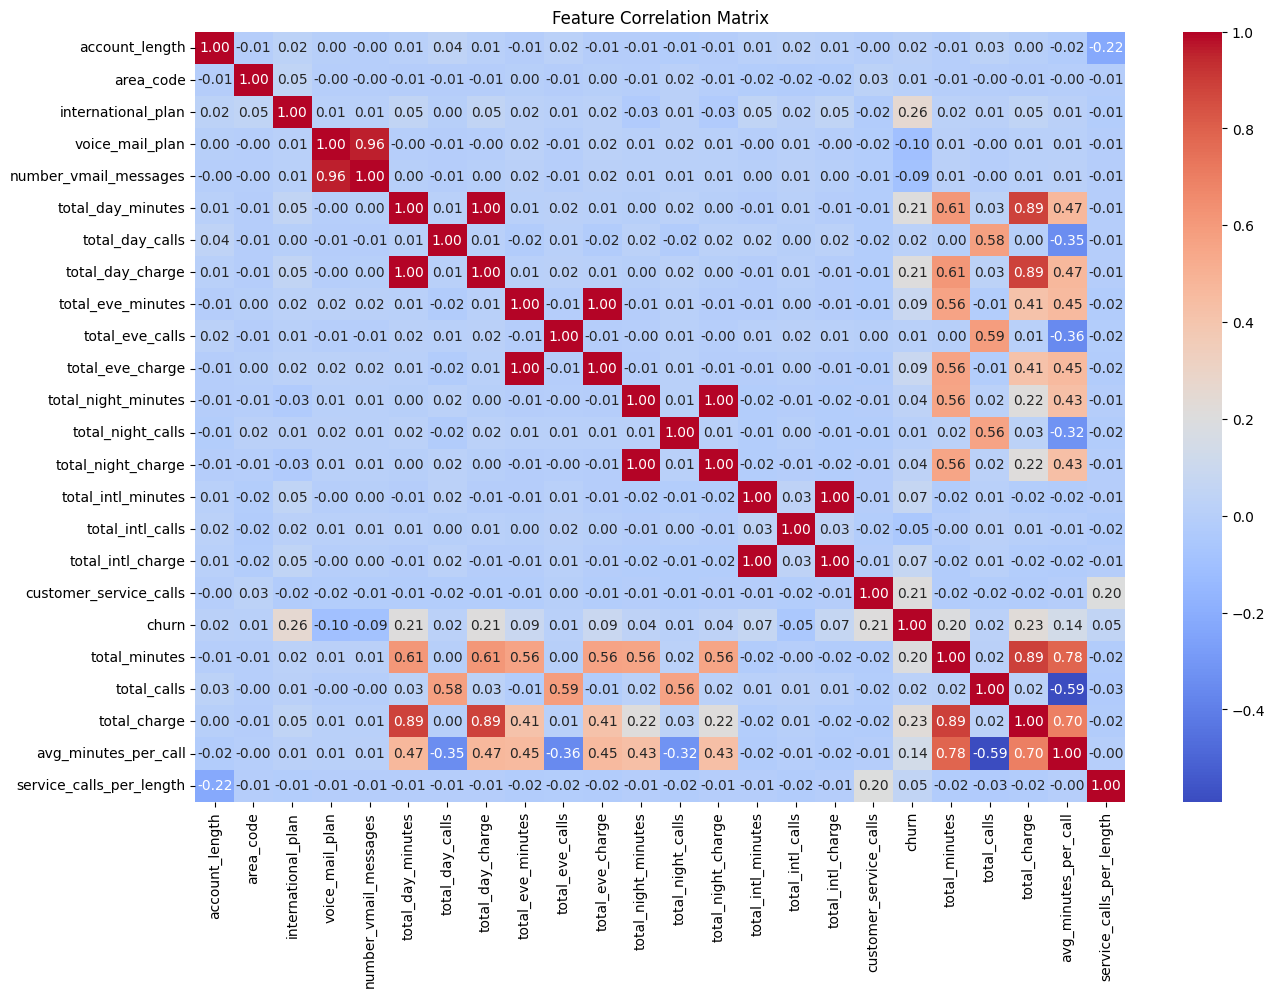

In [451]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


Feature correlation helps us see how different variables in our dataset are connected. If two features have a strong positive correlation (close to 1.0), it means that when one increases, the other tends to increase too. If the correlation is negative (close to -1.0), it means that when one increases, the other decreases.
For example:
- If "total minutes" and "total charge" have a high correlation, it makes sense—more minutes mean a higher charge.
- If "customer service calls" and "churn" have a strong correlation, it might mean that customers who call frequently are likely to leave.
We use correlation to choose the best features for a machine learning model. If two features are almost identical, we can remove one to avoid redundancy. If a feature strongly relates to the target variable (like churn), it could be a key predictor.


In [ ]:
y = df["churn"].value_counts()
print(f"Churn Data :\n{y}\n")

# save all the rows where churn is True
y_True = df["churn"][df["churn"] == True]
print(y_True)

print ("\nChurn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Data :
churn
0    2850
1     483
Name: count, dtype: int64

10      1
15      1
21      1
33      1
41      1
       ..
3301    1
3304    1
3320    1
3322    1
3323    1
Name: churn, Length: 483, dtype: int64

Churn Percentage = 14.491449144914492


In [ ]:
print(df.columns.tolist())


['account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn', 'total_minutes', 'total_calls', 'total_charge', 'avg_minutes_per_call', 'service_calls_per_length']


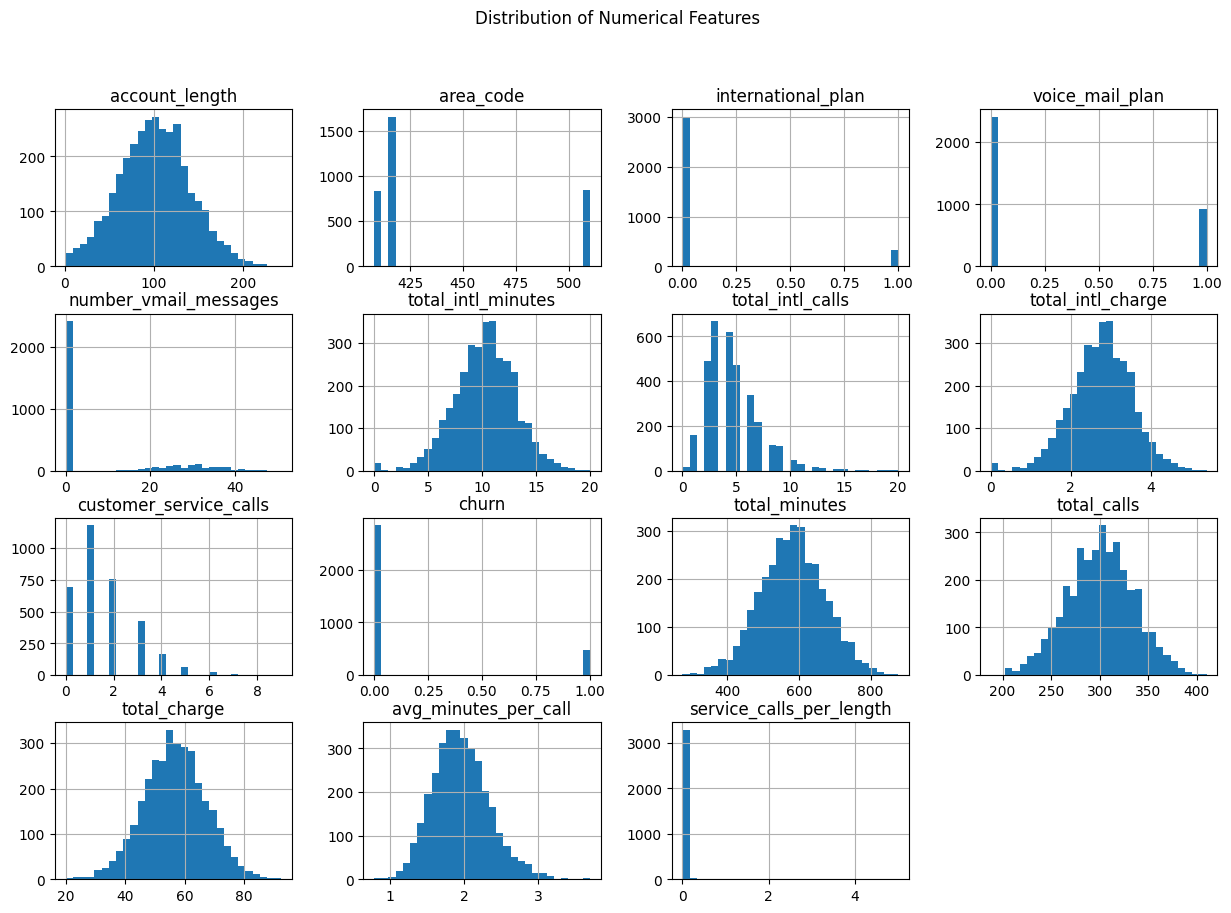

In [ ]:
# Plot distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [453]:
df = df[["customer_service_calls","voice_mail_plan","international_plan","total_minutes","total_charge","avg_minutes_per_call","number_vmail_messages","service_calls_per_length","churn"]]
df.head()

,customer_service_calls,voice_mail_plan,international_plan,total_minutes,total_charge,avg_minutes_per_call,number_vmail_messages,service_calls_per_length,churn
0,1,1,0,707.2,72.86,2.357333,25,0.007812,0
1,1,1,0,611.5,55.54,1.858663,26,0.009346,0
2,0,0,0,527.2,59.00,1.607317,0,0.000000,0
3,2,0,1,558.2,65.02,2.250806,0,0.023810,0
4,3,0,1,501.9,49.36,1.409831,0,0.040000,0


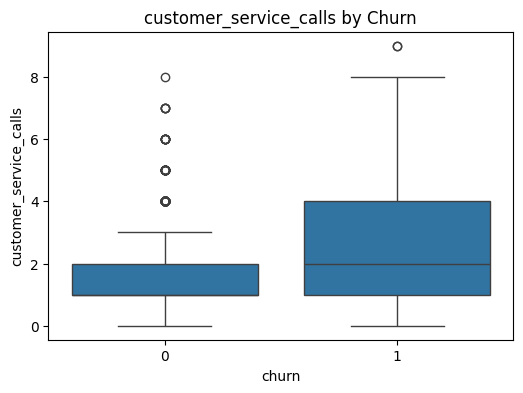

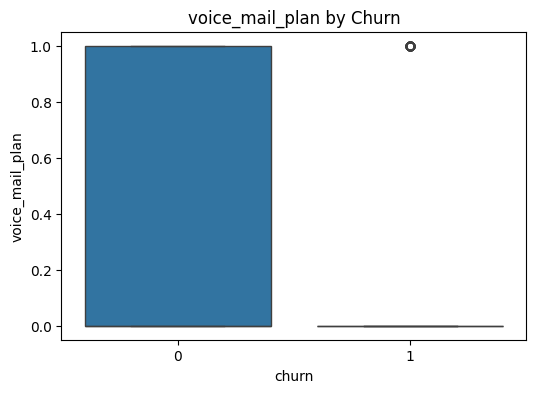

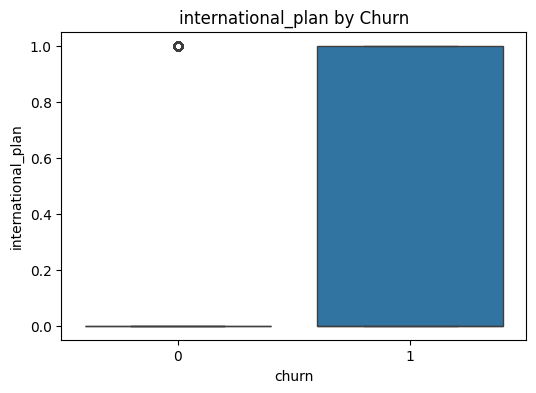

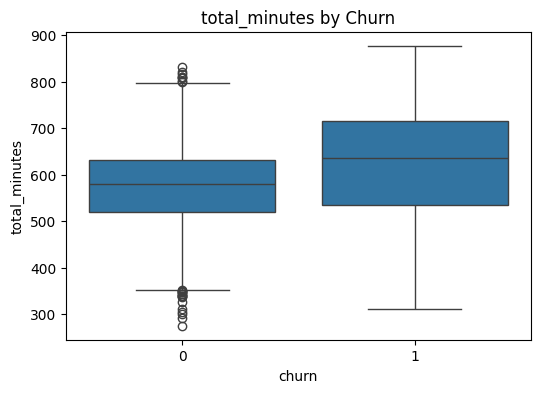

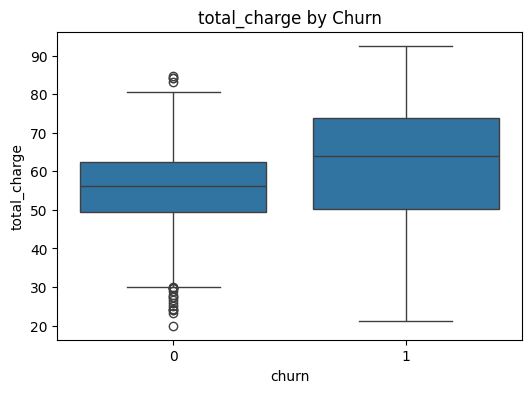

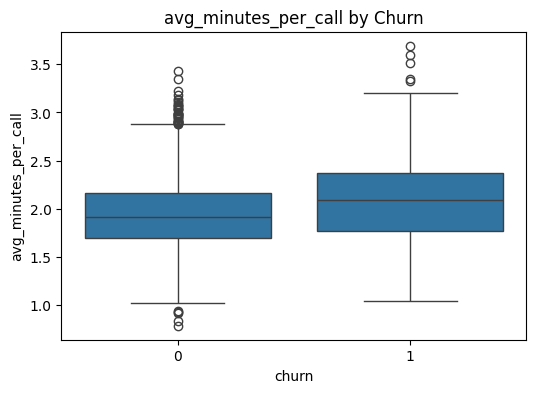

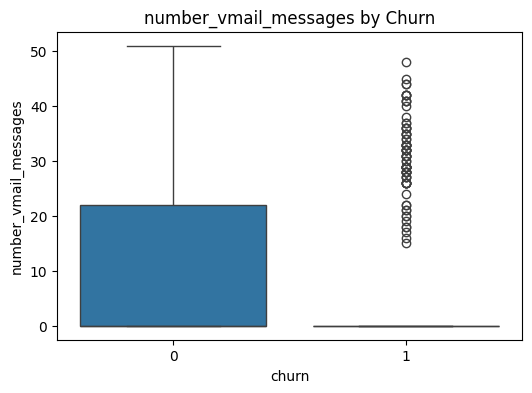

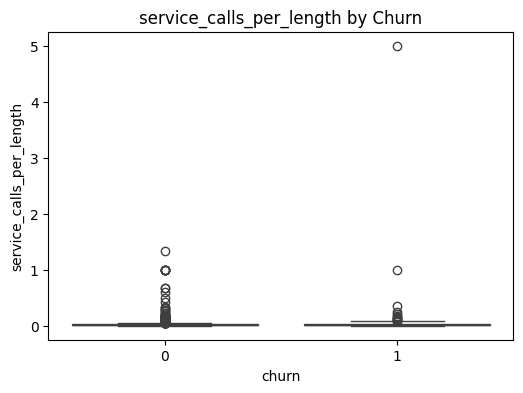

In [455]:
key_features = [
    "customer_service_calls",
    "voice_mail_plan",
    "international_plan",
    "total_minutes",
    "total_charge",
    "avg_minutes_per_call",
    "number_vmail_messages",
    "service_calls_per_length"
]
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.show()



In [456]:
print(df.columns.tolist())


['customer_service_calls', 'voice_mail_plan', 'international_plan', 'total_minutes', 'total_charge', 'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length', 'churn']


In [457]:

X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Identify Numeric and Categorical Columns

In [458]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

In [459]:
# These are numerical features relevant for churn prediction
numeric_features = [
    'customer_service_calls',
    'total_minutes',
    'total_charge',
    'avg_minutes_per_call',
    'number_vmail_messages',
    'service_calls_per_length'
]

# These are categorical features relevant for churn prediction
possible_categoricals = ['international_plan', 'voice_mail_plan']
categorical_features = [col for col in possible_categoricals if col in df.columns]


## Preprocessing (Avoiding Data Leakage)

In [460]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

In [461]:

# Select numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [462]:

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

In [463]:

# Scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

In [464]:

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: churn
0    2284
1     382
Name: count, dtype: int64
After SMOTE: churn
0    2284
1    2284
Name: count, dtype: int64


Before SMOTE
Class 0 (Not Churned): 2284 samples

Class 1 (Churned): 382 samples
> The dataset is highly imbalanced.

After SMOTE
Class 0 (Not Churned): 2284 samples

Class 1 (Churned): 2284 samples
> The dataset is now perfectly balanced.

## Logistic Regression (Baseline Model)

In [ ]:
X_train = X_train.drop(columns=['phone_number'])
X_test = X_test.drop(columns=['phone_number'])

In [466]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_final)
y_prob = model.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.38      0.78      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.68       667
weighted avg       0.87      0.78      0.80       667

ROC AUC Score: 0.8430885491375992



The model correctly identifies 78% of both churned and non-churned customers. It is especially good at catching churners (recall = 78%) but sometimes wrongly predicts churn (precision = 38%). Overall, the model is fairly accurate (78%) and has a strong ability to distinguish between classes (ROC AUC = 0.84).

In [468]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       566
           1       0.85      0.70      0.77       101

    accuracy                           0.94       667
   macro avg       0.90      0.84      0.87       667
weighted avg       0.93      0.94      0.93       667

ROC AUC Score: 0.8430885491375992


The XGBoost model is highly accurate (94%) and performs well at identifying both churned and non-churned customers. It detects 70% of churners (recall) and is correct 85% of the time when it predicts a customer will churn (precision). The ROC AUC score of 0.84 shows the model has a strong ability to distinguish between churn and non-churn.

In [469]:
xgb = XGBClassifier(scale_pos_weight=566/101, use_label_encoder=False, eval_metric='logloss')


## Performance:
Accuracy: 0.98 (excellent overall performance)

Macro Avg F1: 0.95 – balances performance across classes

Weighted Avg F1: 0.98 – influenced by the dominant class (0

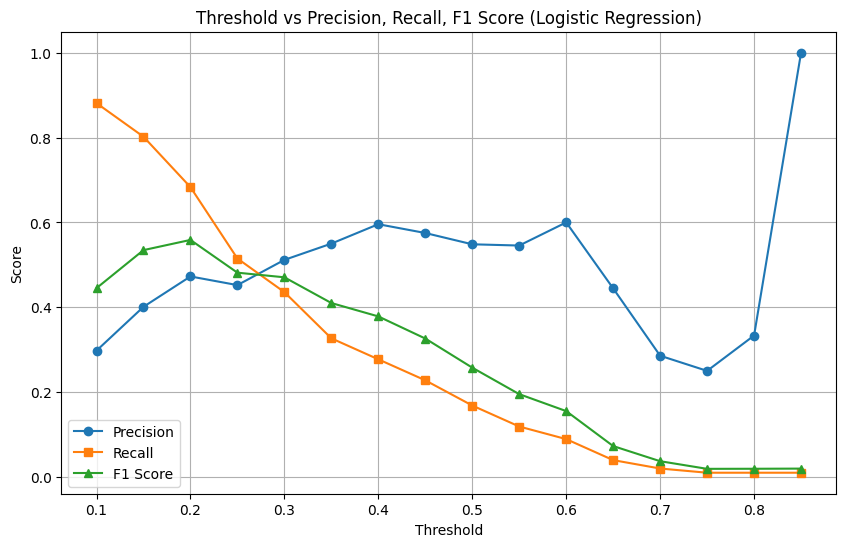

In [470]:
# Get predicted probabilities for the positive class (churn = 1)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.1, 0.9, 0.05)

# Prepare lists to store metrics
precisions, recalls, f1_scores = [], [], []

# Calculate metrics at each threshold
for t in thresholds:
    y_pred_adjusted = (y_prob_lr >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_adjusted))
    recalls.append(recall_score(y_test, y_pred_adjusted))
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Plot precision, recall, F1 vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision, Recall, F1 Score (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


This feature correlation matrix shows how different features in the dataset relate to each other. Darker colors indicate stronger negative correlations, while lighter colors represent weak or no correlations. Since there are no strong positive correlations, it suggests that most features don’t have a direct, predictable relationship with each other. This means that to improve model predictions, you may need to create new combined features that better capture customer behavior.


In [471]:
optimal_threshold = 0.23
y_pred_final = (y_prob_lr >= optimal_threshold).astype(int)


In [ ]:
churn_rate = np.mean(y_pred_final)  
print(f"Churn Prediction Rate: {churn_rate:.2f}")

Churn Prediction Rate: 0.20


In [472]:
actual_churn_rate = np.mean(y_test)
print(f"Actual Churn Rate: {actual_churn_rate:.2f}")

Actual Churn Rate: 0.15


In [473]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       566
           1       0.47      0.60      0.53       101

    accuracy                           0.84       667
   macro avg       0.70      0.74      0.72       667
weighted avg       0.86      0.84      0.85       667



In [474]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [475]:
feature_names = X_train.columns
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of feature_importances: {len(rf.feature_importances_)}")  # Print lengths of each array
print("Feature Names:", feature_names)
print("Feature Importance Shape:", rf.feature_importances_.shape)

Length of feature_names: 8
Length of feature_importances: 8
Feature Names: Index(['customer_service_calls', 'voice_mail_plan', 'international_plan',
       'total_minutes', 'total_charge', 'avg_minutes_per_call',
       'number_vmail_messages', 'service_calls_per_length'],
      dtype='object')
Feature Importance Shape: (8,)


In [476]:
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances_df)


                    Feature  Importance
4              total_charge    0.335019
3             total_minutes    0.170860
0    customer_service_calls    0.127138
5      avg_minutes_per_call    0.110531
7  service_calls_per_length    0.088996
2        international_plan    0.070983
6     number_vmail_messages    0.057887
1           voice_mail_plan    0.038586


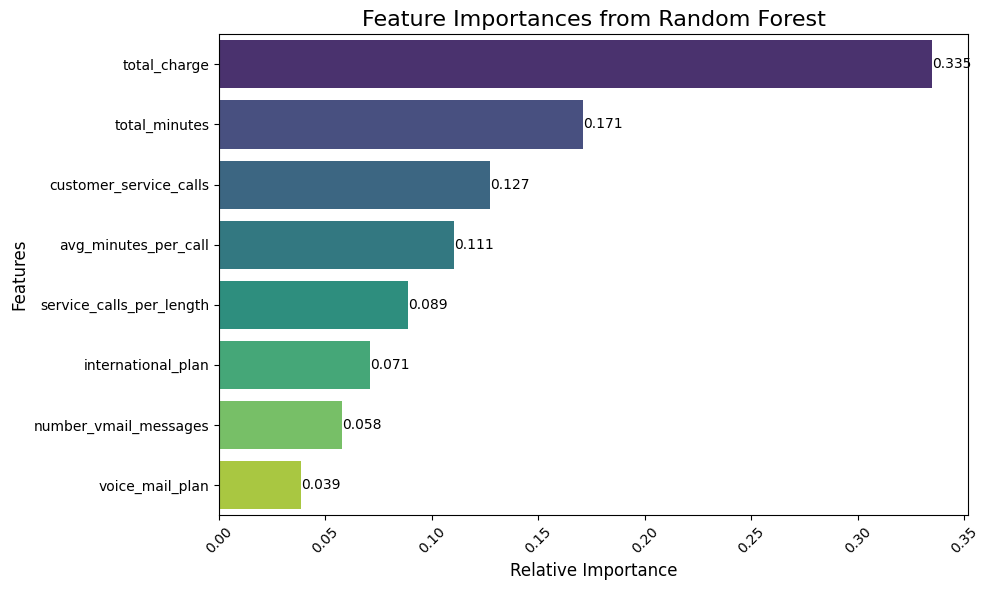

In [ ]:
# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')

# Customizing the plot
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)  

# Adding value labels on each bar
for index, value in enumerate(importances_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.tight_layout()  
plt.show()

"""Total charge is the most critical factor influencing customer churn, followed by usage patterns and customer service interactions, suggesting that pricing strategies and service quality improvements should be prioritized to reduce churn."""

In [480]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_final, y_train, cv=cv, scoring='f1')

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

Cross-Validation F1 Scores: [0.21276596 0.16091954 0.26666667 0.38181818 0.25454545]
Mean F1 Score: 0.2553431601413993


The cross-validation F1 scores range from 0.16 to 0.38, showing high variability that suggests inconsistent model performance across different data subsets. The average F1 score of 0.26 indicates the model struggles to effectively identify churn cases while maintaining precision. This performance likely stems from either severe class imbalance, insufficient training data, or the need for better feature engineering to improve prediction consistency.

In [481]:
# First, let's diagnose the class imbalance
print("Class distribution:\n", pd.Series(y).value_counts())

# 2. Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Class distribution:
 churn
0    2850
1     483
Name: count, dtype: int64


In [ ]:
print(X_resampled.columns.tolist())

['customer_service_calls', 'voice_mail_plan', 'international_plan', 'total_minutes', 'total_charge', 'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length', 'charge_per_minute']


In [486]:
X_resampled["tenure_estimate"] = X_resampled["total_minutes"] / (X_resampled["total_charge"] + 1e-6)
X_resampled["engagement_score"] = X_resampled["avg_minutes_per_call"] * X_resampled["service_calls_per_length"]
X_resampled["service_interaction_rate"] = X_resampled["customer_service_calls"] / (X_resampled["total_minutes"] + 1e-6)

# Check new features
print(X_resampled[["tenure_estimate", "engagement_score", "service_interaction_rate"]].head())

   tenure_estimate  engagement_score  service_interaction_rate
0         9.706286          0.018417                  0.001414
1        11.010083          0.017371                  0.001635
2         8.935593          0.000000                  0.000000
3         8.585051          0.053591                  0.003583
4        10.168152          0.056393                  0.005977


## XGBoost Model & Hyperparameter Tuning

In [ ]:
# Configure the model with class weighting
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    scale_pos_weight=scale,
    eval_metric='aucpr',
    use_label_encoder=False
)

# Cross-validate on resampled data (to handle class imbalance)
cv_scores = cross_val_score(best_xgb, X_resampled, y_resampled, 
                            cv=5, scoring='f1')
print(f"Cross-Validation F1: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Fit the model to the full training set
best_xgb.fit(X_train, y_train)

# Predict probabilities for threshold tuning
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.35  # Can be optimized
y_pred = (y_probs >= threshold).astype(int)


Cross-Validation F1: 0.673 ± 0.001


## Evaluate XGBoost

Test F1 at threshold 0.35: 0.762

Optimized Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.98      0.93      0.95       566
       Churn       0.68      0.87      0.76       101

    accuracy                           0.92       667
   macro avg       0.83      0.90      0.86       667
weighted avg       0.93      0.92      0.92       667



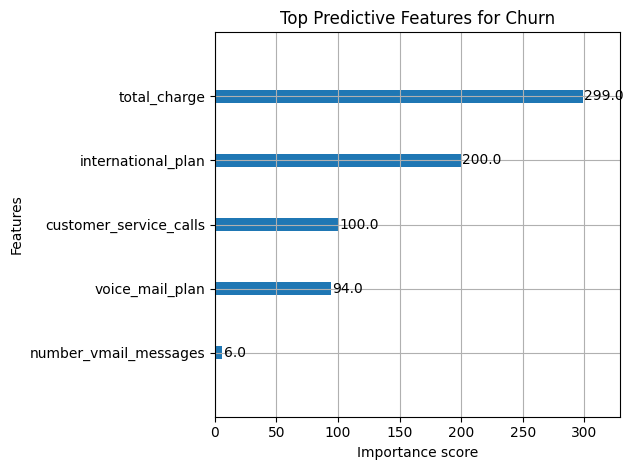

In [496]:
# 5. Enhanced evaluation

# Evaluate with F1 (or add more metrics)
f1 = f1_score(y_test, y_pred)
print(f"Test F1 at threshold {threshold}: {f1:.3f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn']))

# 6. Feature importance visualization
from xgboost import plot_importance

plot_importance(best_xgb, max_num_features=10)
plt.title('Top Predictive Features for Churn')
plt.tight_layout()
plt.show()


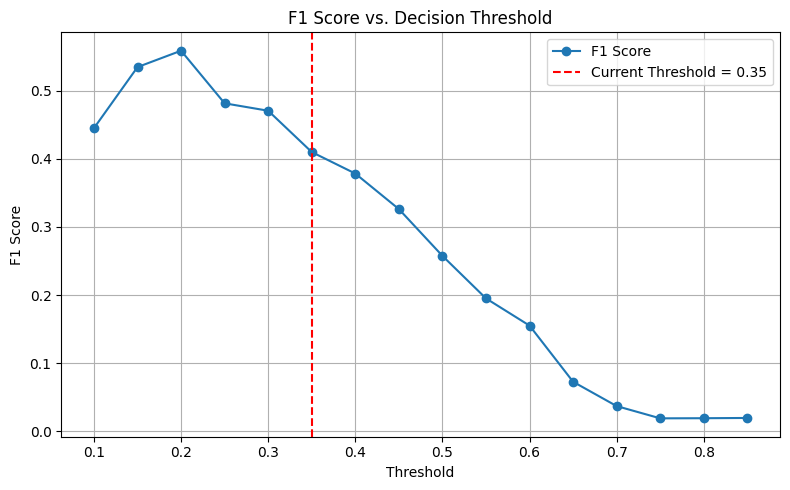

In [498]:
# Plot F1 score vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o', label='F1 Score')
plt.axvline(0.35, color='red', linestyle='--', label='Current Threshold = 0.35')
plt.title('F1 Score vs. Decision Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Feature Importance (XGBoost)

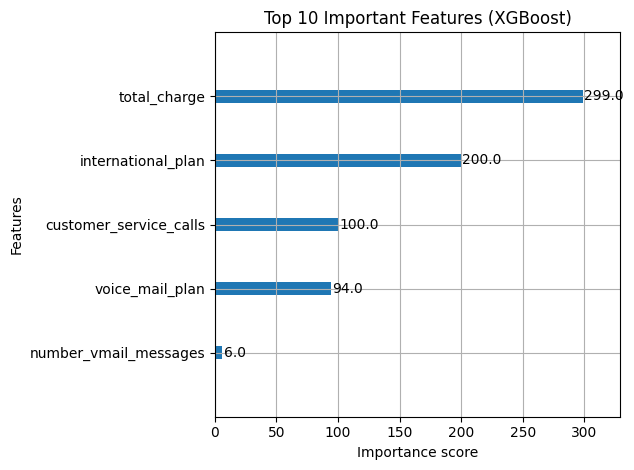

In [501]:

# Plot top 10 most important features
plot_importance(best_xgb, max_num_features=10)
plt.title('Top 10 Important Features (XGBoost)')
plt.tight_layout()
plt.show()

In [505]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)  # Change 'sparse' to 'sparse_output'
encoder.fit(X_train[categorical_cols])

X_train_encoded = encoder.transform(X_train[categorical_cols])

In [507]:
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_train_final = np.hstack((X_train[numeric_cols].values, X_train_encoded))
X_test_final = np.hstack((X_test[numeric_cols].values, X_test_encoded))

In [508]:
model = LogisticRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.55      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.71      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



My model has high accuracy (85%), meaning it correctly classifies most samples, but it struggles with predicting class 1 (churn) because recall is only 0.17, meaning it misses many actual churn cases. The precision for class 1 is 0.55, indicating that when it predicts churn, it's correct 55% of the time, but the overall F1-score (0.26) is low, showing a poor balance between precision and recall. To improve churn detection, i have to do better feature selection, threshold tuning, or handling class imbalance


In [514]:
numeric_features = [
    'customer_service_calls', 'total_minutes', 'total_charge', 
    'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length'
]
categorical_features = ['voice_mail_plan', 'international_plan']
target = 'churn'
# Split your data
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [515]:
# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [516]:
# Create Decision Tree pipeline with SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Predict using default threshold 0.5
y_pred = pipeline.predict(X_test)
print("Classification Report (threshold=0.5):\n")
print(classification_report(y_test, y_pred))

Classification Report (threshold=0.5):

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       570
           1       0.60      0.65      0.62        97

    accuracy                           0.89       667
   macro avg       0.77      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667



In [519]:

# Predict probabilities for threshold tuning (DecisionTreeClassifier supports predict_proba)
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Precision-Recall curve for threshold selection
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Choose threshold to get at least 0.7 recall (example)
target_recall = 0.7
idx = np.argmax(recall >= target_recall)
optimal_threshold = thresholds[idx]

In [520]:
# Apply new threshold
y_pred_thresh = (y_probs >= optimal_threshold).astype(int)

print(f"\nClassification Report at threshold {optimal_threshold:.3f}:\n")
print(classification_report(y_test, y_pred_thresh))



Classification Report at threshold 0.000:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



In [ ]:
# Defining pipeline 
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Define hyperparameter grid to search
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

print("Best hyperparameters:")
print(grid_search.best_params_)

# Use best estimator for predictions
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best hyperparameters:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


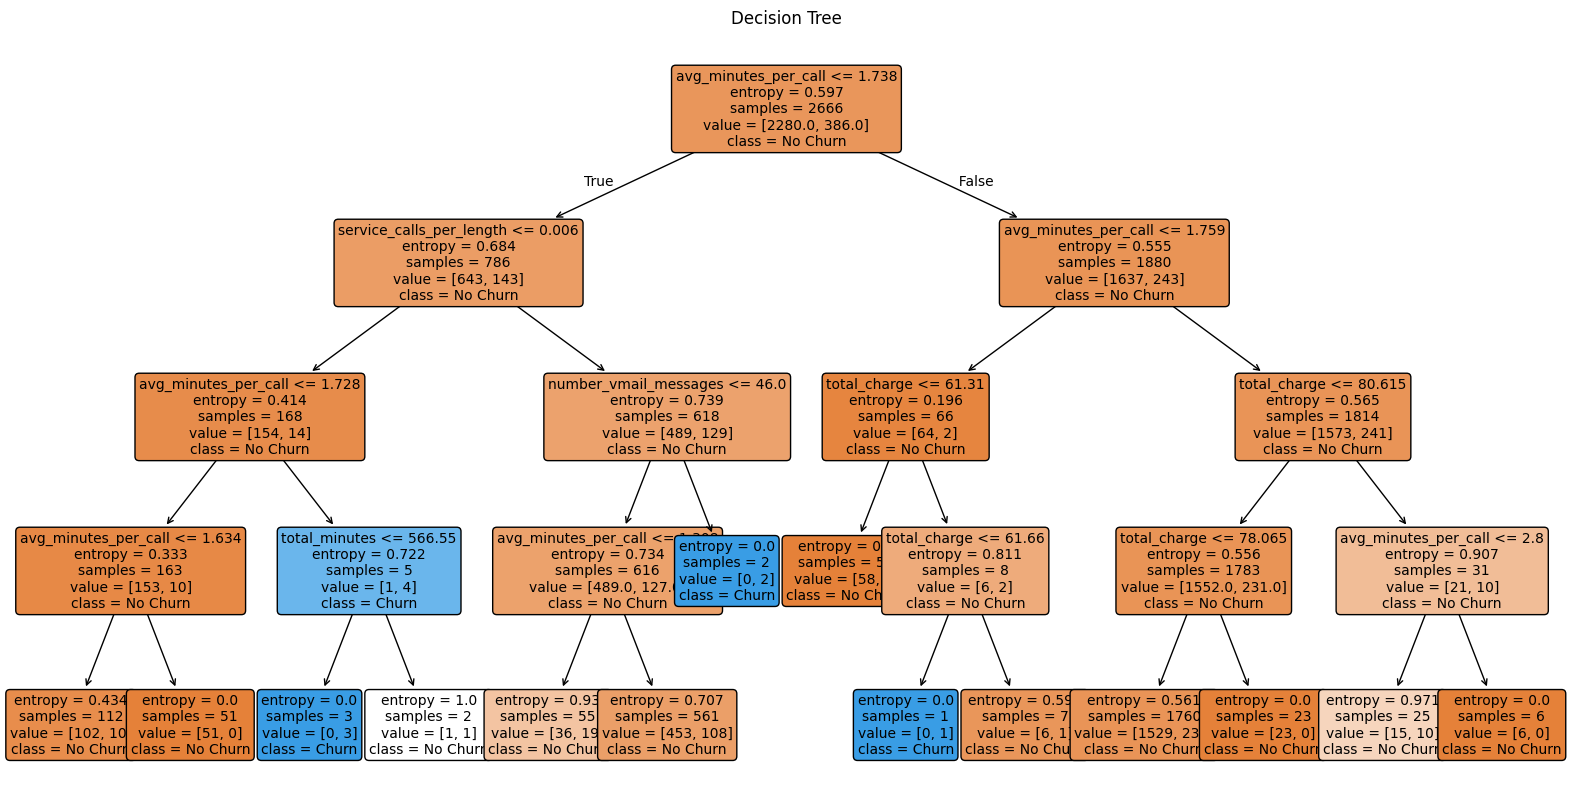

In [524]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=5)
model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
model = DecisionTreeClassifier(max_features='sqrt')
# Train a Decision Tree using entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt_entropy.fit(X_train_final, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_entropy,
          feature_names=feature_names,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree")
plt.show()


The decision tree starts with the most important feature, splitting the data into groups based on specific values. Each split represents a decision where the model determines the next step by checking a threshold. As you move down the tree, features become more specific, leading to final classifications at the leaf nodes, where predictions (like churn or no churn) are made. The depth and structure of the tree indicate how complex the relationships between features are, and optimizing it can improve model accuracy.


In [525]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict and evaluate
y_pred_dt = dt_entropy.predict(X_test_final)
y_prob_dt = dt_entropy.predict_proba(X_test_final)[:, 1]

print("Decision Tree (Entropy) - Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))


Decision Tree (Entropy) - Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667

ROC AUC Score: 0.4709169831795984


The Decision Tree model has high accuracy (85%), but it completely fails to predict class 1 (churn) since precision, recall, and F1-score for churn are 0.00. This means the model is overfitting to the majority class (non-churn) and never correctly identifying churned customers. The ROC AUC score (0.47) is low, indicating poor separation between churn and non-churn instances. To improve performance, you might need better feature selection, balanced class weights, or techniques like SMOTE to handle class imbalance. 


In [526]:
# Adjusting class weights to balance the importance of churn cases
best_tree = DecisionTreeClassifier(criterion="entropy", class_weight={0: 1, 1: 3}, random_state=42)
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       random_state=42)

In [527]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio based on need
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [528]:
best_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       random_state=42)

In [529]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_tree, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [530]:
best_tree.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       random_state=42)

In [532]:
# Get feature importance from trained Decision Tree
importance = best_tree.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]

# Print top features
for i in sorted_indices[:10]:  # Show top 10
    print(f"{features[i]}: {importance[i]:.4f}")

voice_mail_plan: 0.4648
customer_service_calls: 0.2685
international_plan: 0.2667


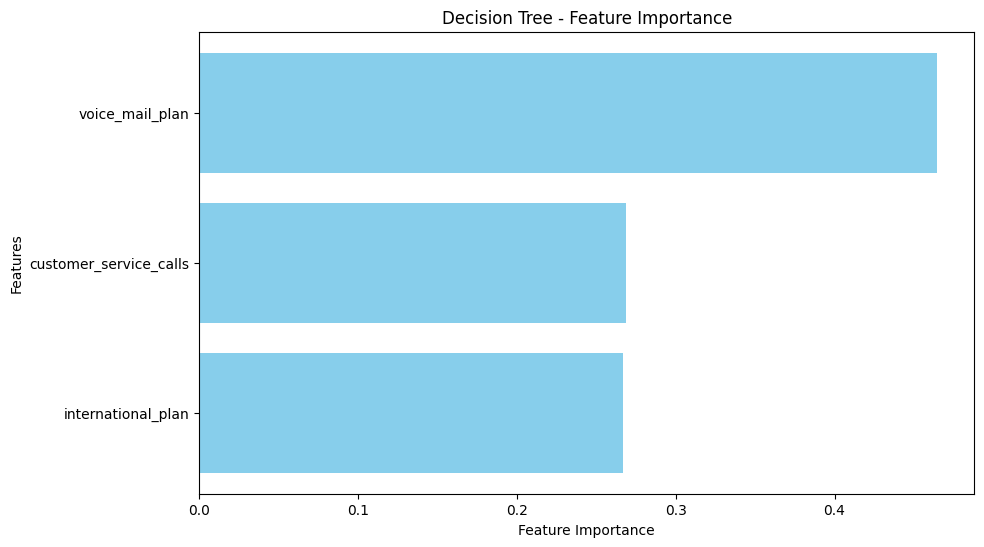

In [533]:
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importance[sorted_indices], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Decision Tree - Feature Importance")
plt.gca().invert_yaxis()  # Flip to show highest first
plt.show()